In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv('data.csv')
data

,disrict,client_id,client_catg,region,creation_date,target,1transactions_count,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean
0,60,train_Client_0,11,101,31/12/1994,0.0,35,352.400000,10.571429,0.000000,0.000000
1,69,train_Client_1,11,107,29/05/2002,0.0,37,557.540541,0.000000,0.000000,0.000000
2,62,train_Client_10,11,301,13/03/1986,0.0,18,798.611111,37.888889,0.000000,0.000000
3,69,train_Client_100,11,105,11/07/1996,0.0,20,1.200000,0.000000,0.000000,0.000000
4,62,train_Client_1000,11,303,14/10/2014,0.0,14,663.714286,104.857143,117.357143,36.714286
...,...,...,...,...,...,...,...,...,...,...,...
135488,62,train_Client_99995,11,304,26/07/2004,0.0,71,1.957746,0.000000,0.000000,0.000000
135489,63,train_Client_99996,11,311,25/10/2012,0.0,41,185.853659,0.756098,0.000000,0.000000
135490,63,train_Client_99997,11,311,22/11/2011,0.0,36,273.083333,0.000000,0.000000,0.000000
135491,60,train_Client_99998,11,101,22/12/1993,0.0,2,300.000000,70.500000,0.000000,0.000000


Recall from EDA part that the data in 'disrict', 'client_catg', 'region' column is consist of integers. It would be considered a litle bit suspicious since they are unique. One can claim that it can be considered as categorical. so i cnverted them to categorical.

In [3]:
cols = ['disrict', 'client_catg', 'region']
for item in cols:
    data[item] = data[item].astype('category')


In [4]:
data['target'] = data['target'].astype(float)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   disrict                    135493 non-null  category
 1   client_id                  135493 non-null  object  
 2   client_catg                135493 non-null  category
 3   region                     135493 non-null  category
 4   creation_date              135493 non-null  object  
 5   target                     135493 non-null  float64 
 6   1transactions_count        135493 non-null  int64   
 7   consommation_level_1_mean  135493 non-null  float64 
 8   consommation_level_2_mean  135493 non-null  float64 
 9   consommation_level_3_mean  135493 non-null  float64 
 10  consommation_level_4_mean  135493 non-null  float64 
dtypes: category(3), float64(5), int64(1), object(2)
memory usage: 8.7+ MB


I also need to convert the creation date from object to datetime datatype

In [6]:
data['creation_date'] = pd.to_datetime(data['creation_date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   disrict                    135493 non-null  category      
 1   client_id                  135493 non-null  object        
 2   client_catg                135493 non-null  category      
 3   region                     135493 non-null  category      
 4   creation_date              135493 non-null  datetime64[ns]
 5   target                     135493 non-null  float64       
 6   1transactions_count        135493 non-null  int64         
 7   consommation_level_1_mean  135493 non-null  float64       
 8   consommation_level_2_mean  135493 non-null  float64       
 9   consommation_level_3_mean  135493 non-null  float64       
 10  consommation_level_4_mean  135493 non-null  float64       
dtypes: category(3), datetime64[ns](1), float64(5), int64

Now i will extract the month date and year in to seperate columns

In [8]:
#to extract year, month, day
data['year'] = data['creation_date'].dt.year
data['month'] = data['creation_date'].dt.month
data['day'] = data['creation_date'].dt.day
data['month_name'] = data['creation_date'].dt.month_name()


In [9]:
data = data.drop(['client_id','creation_date'], axis=1)

In [10]:
data.to_csv('feat_data.csv', index=False)

# need to deal with the class imbalance in the target variable

In [11]:
#stratify datasetso the train and test set have the same ratio of each class
df_full_train, df_test = train_test_split(data,test_size=0.2,stratify=data['target'], random_state=2022)
#df_full_train, df_test = train_test_split(data,test_size=0.2,random_state=2022)

In [12]:
df_full_train

,disrict,client_catg,region,target,1transactions_count,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean,year,month,day,month_name
112600,60,11,101,0.0,66,603.484848,216.409091,16.257576,0.000000,1986,3,28,March
68540,69,11,103,0.0,44,198.522727,9.090909,18.181818,48.636364,2011,12,14,December
134928,69,11,107,0.0,24,248.000000,0.000000,0.000000,0.000000,2014,11,11,November
4578,69,11,104,0.0,22,538.772727,94.136364,109.090909,66.318182,2011,6,1,June
126016,60,11,101,0.0,1,35.000000,0.000000,0.000000,0.000000,1996,11,20,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83782,69,11,104,0.0,12,254.833333,0.000000,0.000000,0.000000,1998,10,20,October
33445,60,11,101,0.0,57,460.719298,98.859649,0.000000,0.000000,1985,6,3,June
28155,62,11,301,0.0,16,424.937500,15.312500,0.000000,0.000000,1999,3,19,March
98974,60,11,101,0.0,51,361.862745,0.000000,0.000000,0.000000,2010,4,13,April


In [13]:
df_train, df_val = train_test_split(df_full_train,test_size=0.25, stratify=df_full_train['target'], random_state=2022)
#df_train, df_val = train_test_split(df_full_train,test_size=0.25, random_state=2022)

In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
y_train = df_train.target.values
y_val = df_val.target.values
y_test = df_test.target.values

In [16]:
del df_train['target']
del df_val['target']
del df_test['target']

# One-hot encoding
- Use scikit-Learn to encode categorical features

In [18]:
from sklearn.feature_extraction import DictVectorizer

In [19]:
dv = DictVectorizer(sparse=False)

In [20]:
train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

In [21]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
import collections
counter = collections.Counter(y_train)
print('Before', counter)
#oversampling the train dataset using SMOTE
smt = SMOTE()
df_train_sm,y_train_sm = smt.fit_resample(X_train, y_train)

counter = collections.Counter(y_train_sm)
print('After', counter)

Before Counter({0.0: 76755, 1.0: 4540})
After Counter({0.0: 76755, 1.0: 76755})


# Base Model

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()

In [26]:
model.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_pred = model.predict_proba(X_val)[:,1]

In [28]:
roc_auc_score(y_val, y_pred)

0.690537760524502

# Decision tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt = DecisionTreeClassifier(random_state=2022)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2022)

In [34]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.5444920178743239

# Tuning decision tree

In [35]:
for d in [1,2,3,4,5,6,10,15,20,None]:
    
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f'% (d, auc))
    
# parameters = {'max_depth' : [1,2,3,4,5,6,10,15,20,None],
#               'min_samples_leaf' : [1,2,5,10,15,20,100,200,500]           
#               }


# dt_v2 = GridSearchCV(dt, parameters, cv=10, n_jobs=-1)


# dt_v2.fit(X_train, y_train)

# print('Best Paraneters', dt_v2.best_params_)

# y_pred_ = dt_v2.best_estimator_.predict_proba(X_val)[:,1]

# auc = roc_auc_score(y_val, y_pred_)
# #rmse= np.sqrt(mean_squared_error(y_val,y_pred_))
# print(f"Best auc score: {auc.round(3)}")

   1 -> 0.618
   2 -> 0.678
   3 -> 0.702
   4 -> 0.720
   5 -> 0.728
   6 -> 0.730
  10 -> 0.714
  15 -> 0.623
  20 -> 0.563
None -> 0.547


In [36]:
scores = []

for d in [4,5,6]:
    for s in [1,2,5,10,15,20,100,200,500]:
        dt = DecisionTreeClassifier(max_depth=d)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d,s,auc))

In [37]:
columns = ['max_depth','min_sample_leaf','auc']
df_scores = pd.DataFrame(scores, columns = columns)
df_scores.head()

,max_depth,min_sample_leaf,auc
0,4,1,0.719541
1,4,2,0.719541
2,4,5,0.719541
3,4,10,0.719541
4,4,15,0.719541


In [38]:
df_scores.sort_values(by='auc', ascending =False).head()

,max_depth,min_sample_leaf,auc
26,6,500,0.730193
21,6,10,0.730193
19,6,2,0.730193
25,6,200,0.730192
24,6,100,0.730192


In [39]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)

In [40]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.7311938240349447

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf = RandomForestClassifier(n_estimators=10, random_state =1)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [43]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.6488266261565198

# Tuning Random Forest

In [44]:
scores = []

for n in range(10,201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state =1)
    rf.fit(X_train,y_train)
    
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

In [45]:
df_scores = pd.DataFrame(scores, columns = ['n_estimators','auc'])
df_scores

,n_estimators,auc
0,10,0.648827
1,20,0.686618
2,30,0.699169
3,40,0.705347
4,50,0.710968
5,60,0.716544
6,70,0.719340
7,80,0.721208
8,90,0.725243
9,100,0.725691


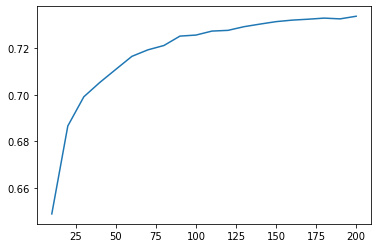

In [46]:
 plt.plot(df_scores.n_estimators, df_scores.auc)

In [47]:
scores = []

for d in [5,10,15]:
    for n in range(10,201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth = d,
                                    random_state =1)
        rf.fit(X_train,y_train)

        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))

In [56]:
columns =  ['max_depth', 'n_estimators','auc']
df_scores = pd.DataFrame(scores, columns =columns)
df_scores.sort_values(by='auc',ascending=False)

,max_depth,n_estimators,auc
39,3,200,0.754475
71,10,120,0.754421
70,10,110,0.754358
72,10,130,0.754279
38,3,190,0.754274
...,...,...,...
60,10,10,0.745351
1,1,20,0.745101
0,1,10,0.743983
20,3,10,0.743837


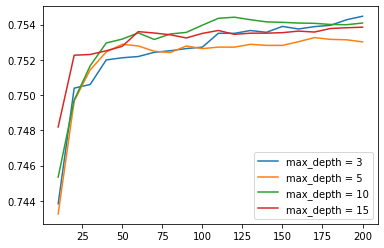

In [57]:
for d in [3,5,10,15]:
    df_subset = df_scores[df_scores.max_depth ==d]
    plt.plot(df_subset.n_estimators,
             df_subset.auc,
             label = 'max_depth = %d' % d)
plt.legend()

In [58]:
max_depth = 3

In [51]:
scores = []

for s in [1,3,5,10,15, 50]:
    for n in range(10,201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth = max_depth,
                                    min_samples_leaf=s,
                                    random_state =1)
        rf.fit(X_train,y_train)

        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))

In [59]:
columns =  ['min_samples_leaf', 'n_estimators','auc']
df_scores = pd.DataFrame(scores, columns =columns)
df_scores.sort_values(by='auc', ascending=False)

,min_samples_leaf,n_estimators,auc
39,3,200,0.754475
71,10,120,0.754421
70,10,110,0.754358
72,10,130,0.754279
38,3,190,0.754274
...,...,...,...
60,10,10,0.745351
1,1,20,0.745101
0,1,10,0.743983
20,3,10,0.743837


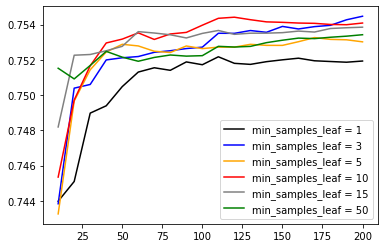

In [53]:
colors = ['black', 'blue', 'orange', 'red', 'grey', 'green']
min_samples_leaf_values = [1,3,5,10,15,50]

for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf ==s]
    plt.plot(df_subset.n_estimators,
             df_subset.auc,
             color = col,
             label = 'min_samples_leaf = %d' % s)
plt.legend()

In [63]:
 rf = RandomForestClassifier(n_estimators=200,
                                    max_depth = 3,min_samples_leaf=3,
                                    random_state =2022)
rf.fit(X_train,y_train)

y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.717496140305993

In [ ]:
# watchlist = [(dtrain, 'train'), (dval, 'val')]

# xgb_params = {
#     'eta': 0.3,
#     'max_depth': 3,
#     'min_child_weight': 1,
    
#     'objective': 'binary:logistic',
#     'eval_metric': 'auc',
#     'nthread': 8,
#     'seed': 1,
#     'silent': 1,
#     'verbosity':1,
# }

# model = xgb.train(xgb_params, dtrain,num_boost_round=200,evals=watchlist,verbose_eval=10)

In [ ]:
# df_test

In [ ]:
# df_test.columns